In [1]:
import sys, os
print(sys.version)
os.path.dirname(sys.executable)

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


'/home/bart/miniconda3/bin'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{braket}')

Import gap data (from DiagHam) and join with band geometry data (from BandGeometry.m)


In [46]:
# bosons_onsite
quartic_boson_df = pd.read_csv("~/DiagHam_Stability/trunk/tutorials/03_benchmark/t2_gap/bosons_onsite/bosons_onsite_outfile.csv",
                        usecols=['UCarea','t2','gap'])
quartic_boson_geom_df = pd.read_csv("~/DiagHam_Stability/trunk/tutorials/03_benchmark/t2_trace/bosons_geometry.csv")
boson_full_df = pd.merge(quartic_boson_df,quartic_boson_geom_df,on=['UCarea','t2'])

# fermions_NN
quartic_df = pd.read_csv("~/DiagHam_Stability/trunk/tutorials/03_benchmark/t2_gap/fermions_NN/fermions_NN_outfile.csv",
                        usecols=['UCarea','t2','gap'])
quartic_geom_df = pd.read_csv("~/DiagHam_Stability/trunk/tutorials/03_benchmark/t2_trace/fermions_geometry.csv")
quartic_full_df = pd.merge(quartic_df,quartic_geom_df,on=['UCarea','t2'])

# fermions_exp
rsquared_df = pd.read_csv("~/DiagHam_Stability/trunk/tutorials/03_benchmark/t2_gap/fermions_exp/fermions_exp_outfile.csv",
                        usecols=['UCarea','t2','gap'])
rsquared_full_df = pd.merge(rsquared_df,quartic_geom_df,on=['UCarea','t2'])

# bosons_onsite (Fig. 9)

In [50]:
print(quartic_boson_df)

     UCarea    t2           gap
0         9 -0.25  3.924689e-06
1         9 -0.24  1.161915e-07
2         9 -0.23  3.587908e-06
3         9 -0.22  6.528457e-06
4         9 -0.21  8.975212e-06
..      ...   ...           ...
177      81 -0.04  6.160142e-01
178      81 -0.03  6.160200e-01
179      81 -0.02  6.160262e-01
180      81 -0.01  6.160328e-01
181      81  0.00  6.160397e-01

[182 rows x 3 columns]


In [51]:
print(quartic_geom_df)

    UCarea    t2          rmsB      rmsTrace  traceIneq   detIneq
0       24 -0.25  3.147897e-09  3.104770e-07   0.014039  1.065971
1       24 -0.24  5.606315e-09  1.048925e-07   0.011085  0.840390
2       24 -0.23  6.996636e-09  2.105560e-07   0.008747  0.662359
3       24 -0.22  5.744862e-09  1.940300e-07   0.006886  0.520951
4       24 -0.21  3.892355e-09  1.400962e-07   0.005398  0.408103
..     ...   ...           ...           ...        ...       ...
73      96 -0.04  1.083106e-13  4.318819e-12   0.000005  0.001463
74      96 -0.03  7.350164e-14  2.910770e-12   0.000009  0.002608
75      96 -0.02  1.153528e-13  4.525705e-12   0.000013  0.003958
76      96 -0.01  7.369736e-14  2.872879e-12   0.000018  0.005459
77      96  0.00  3.056969e-13  1.215020e-11   0.000023  0.007071

[78 rows x 6 columns]


In [49]:
print(boson_full_df)

    UCarea    t2       gap          rmsB      rmsTrace  traceIneq   detIneq
0       16 -0.25  0.612198  1.446575e-06  9.597288e-05   0.013720  0.694369
1       16 -0.24  0.612318  5.627500e-07  8.531785e-06   0.011368  0.574674
2       16 -0.23  0.612440  1.540900e-06  3.772771e-05   0.009363  0.472824
3       16 -0.22  0.612564  1.887092e-06  5.803919e-05   0.007655  0.386234
4       16 -0.21  0.612689  1.859348e-06  6.237550e-05   0.006203  0.312747
..     ...   ...       ...           ...           ...        ...       ...
73      81 -0.04  0.616014  4.517897e-14  1.834022e-12   0.000007  0.001786
74      81 -0.03  0.616020  5.292994e-14  2.111384e-12   0.000012  0.003150
75      81 -0.02  0.616026  9.940223e-14  3.933610e-12   0.000019  0.004755
76      81 -0.01  0.616033  1.035917e-13  4.095673e-12   0.000026  0.006541
77      81  0.00  0.616040  5.238324e-13  2.067131e-11   0.000033  0.008459

[78 rows x 7 columns]


In [48]:
print(boson_full_df.loc[boson_full_df['UCarea']==16]['gap'])

0     0.612198
1     0.612318
2     0.612440
3     0.612564
4     0.612689
5     0.612816
6     0.612944
7     0.613074
8     0.613206
9     0.613339
10    0.613474
11    0.613611
12    0.613749
13    0.613889
14    0.614030
15    0.614173
16    0.614317
17    0.614463
18    0.614611
19    0.614760
20    0.614910
21    0.615061
22    0.615213
23    0.615367
24    0.615521
25    0.615675
Name: gap, dtype: float64


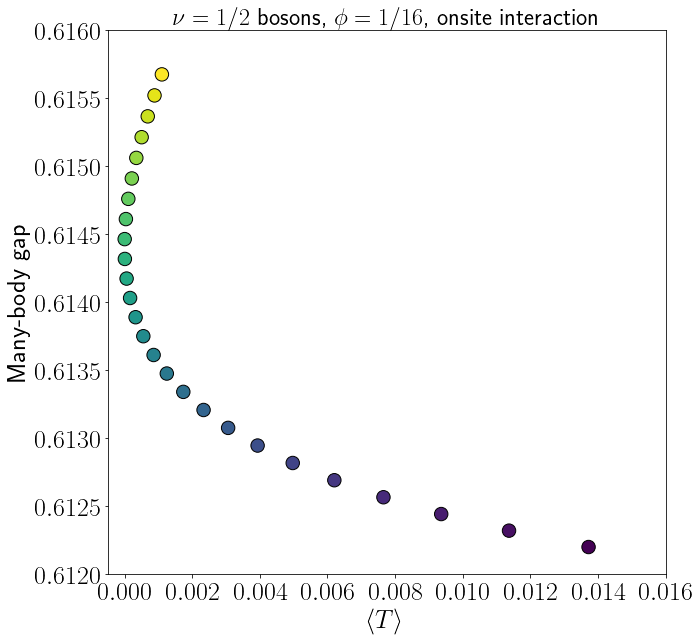

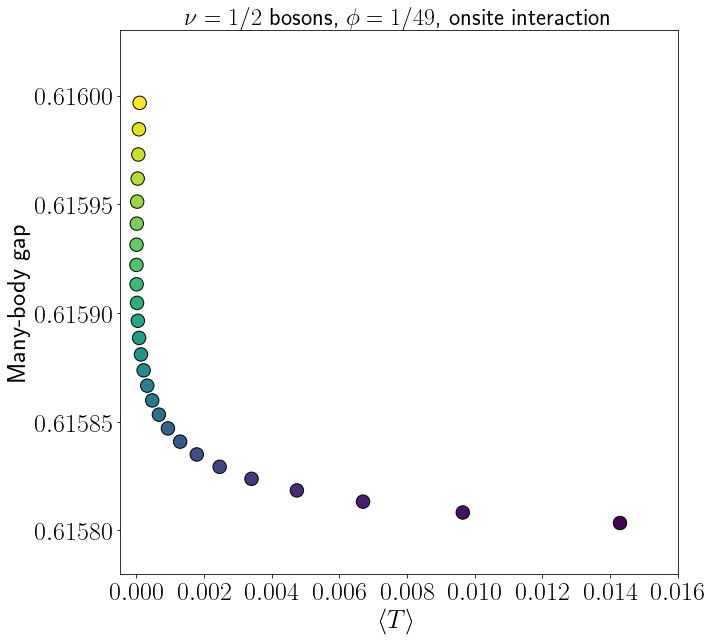

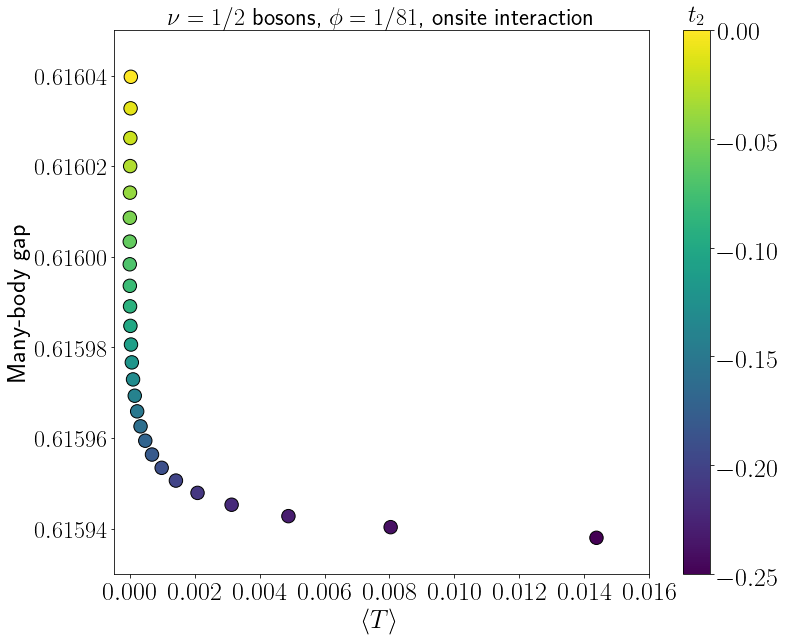

In [4]:
# Fig.9(a)
plt.figure(figsize=(10,10))
plt.scatter(boson_full_df.loc[boson_full_df['UCarea']==16]['traceIneq'],
            boson_full_df.loc[boson_full_df['UCarea']==16]['gap'],
            c=boson_full_df.loc[boson_full_df['UCarea']==16]['t2'],
           cmap=plt.cm.viridis, edgecolor='black', s=180)
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/2$ bosons, $\phi=1/16$, onsite interaction",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.ylim(0.612,0.616)
plt.savefig("bosons_16_onsite.pdf", pad_inches=0, bbox_inches='tight')

# Fig.9(b)
plt.figure(figsize=(10, 10))
plt.scatter(boson_full_df.loc[boson_full_df['UCarea']==49]['traceIneq'],
            boson_full_df.loc[boson_full_df['UCarea']==49]['gap'],
            c=boson_full_df.loc[boson_full_df['UCarea']==49]['t2'],
           cmap=plt.cm.viridis,
           edgecolor='black',s=180)
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/2$ bosons, $\phi=1/49$, onsite interaction",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.ylim(0.61578,0.61603)
plt.savefig("bosons_49_onsite.pdf", pad_inches=0, bbox_inches='tight')

# Fig.9(c)
plt.figure(figsize=(12,10))
plt.scatter(boson_full_df.loc[boson_full_df['UCarea']==81]['traceIneq'],
            boson_full_df.loc[boson_full_df['UCarea']==81]['gap'],
            c=boson_full_df.loc[boson_full_df['UCarea']==81]['t2'],
           cmap=plt.cm.viridis,edgecolor='black',s=180)
cbar=plt.colorbar()
cbar.ax.set_title(r"$t_2$",fontsize=24)
cbar.ax.tick_params(labelsize=26)
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=24)
plt.title(r"$\nu=1/2$ bosons, $\phi=1/81$, onsite interaction",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.ylim(0.61593,0.61605)
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
plt.savefig("bosons_81_onsite.pdf", pad_inches=0, bbox_inches='tight')

# fermions_NN (Fig. 10)

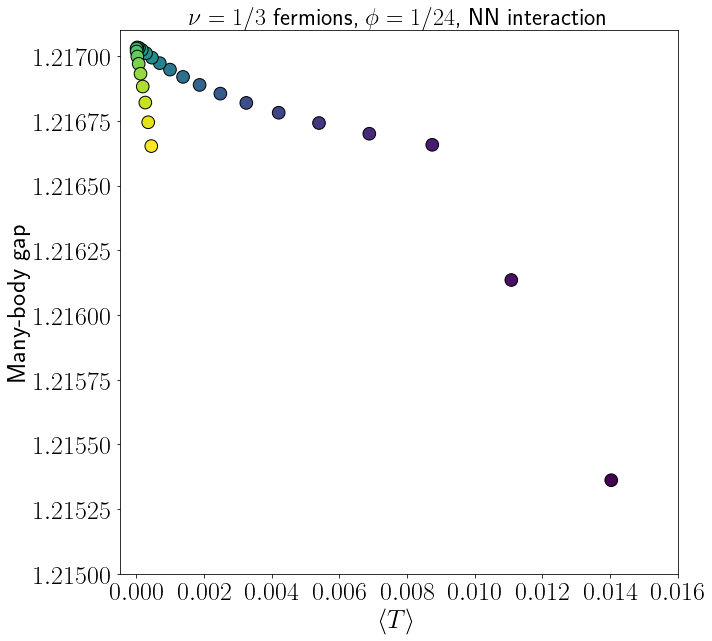

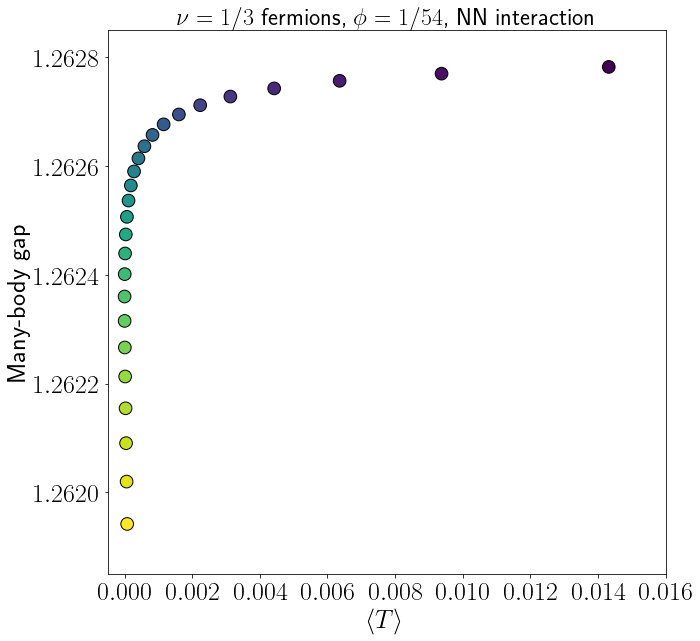

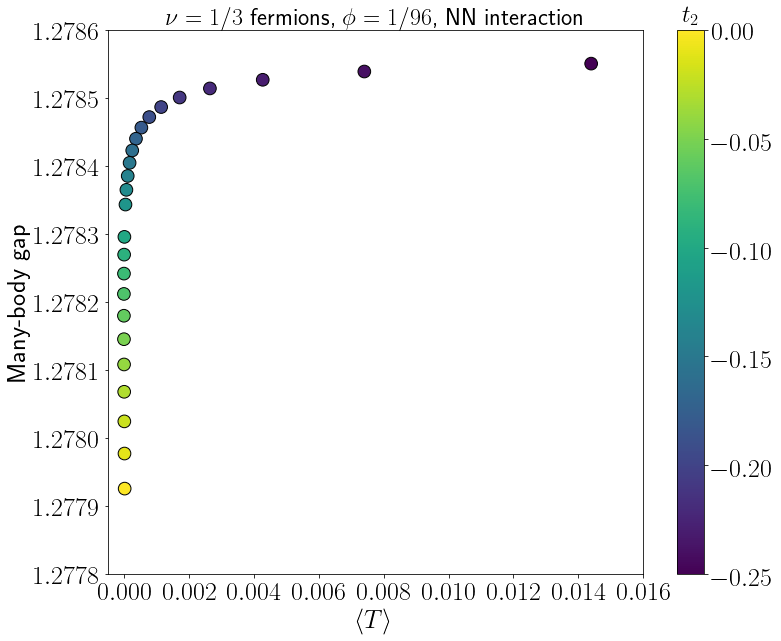

In [11]:
# Fig.10(a)
plt.figure(figsize=(10,10))
plt.scatter(quartic_full_df.loc[quartic_full_df['UCarea']==24]['traceIneq'],
            quartic_full_df.loc[quartic_full_df['UCarea']==24]['gap'],
            c=quartic_full_df.loc[quartic_full_df['UCarea']==24]['t2'],
           cmap=plt.cm.viridis,edgecolor='black',s=160)
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/24$, NN interaction",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.ylim(1.215,1.2171)
plt.savefig("fermions_24_NN.pdf", pad_inches=0, bbox_inches='tight')

# Fig.10(b)
plt.figure(figsize=(10,10))
plt.scatter(quartic_full_df.loc[quartic_full_df['UCarea']==54]['traceIneq'],
            quartic_full_df.loc[quartic_full_df['UCarea']==54]['gap'],
            c=quartic_full_df.loc[quartic_full_df['UCarea']==54]['t2'],
           cmap=plt.cm.viridis, edgecolor='black', s=160)
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/54$, NN interaction",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.xlim(-0.0005,0.016)
plt.ylim(1.26185,1.26285)
plt.savefig("fermions_54_NN.pdf", pad_inches=0, bbox_inches='tight')

# Fig.10(c)
plt.figure(figsize=(12,10))
plt.scatter(quartic_full_df.loc[quartic_full_df['UCarea']==96]['traceIneq'],
            quartic_full_df.loc[quartic_full_df['UCarea']==96]['gap'],
            c=quartic_full_df.loc[quartic_full_df['UCarea']==96]['t2'],
           cmap=plt.cm.viridis, edgecolor='black', s=160)
cbar=plt.colorbar()
cbar.ax.set_title(r"$t_2$",fontsize=24)
cbar.ax.tick_params(labelsize=26)
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/96$, NN interaction",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.ylim(1.2778,1.2786)
plt.savefig("fermions_96_NN.pdf", pad_inches=0, bbox_inches='tight')

# fermions_exp (Fig. 11)

In [42]:
gap_24 = rsquared_full_df.loc[rsquared_full_df['UCarea']==24]['gap'].divide(2*24)
gap_54 = rsquared_full_df.loc[rsquared_full_df['UCarea']==54]['gap'].divide(2*24)
gap_96 = rsquared_full_df.loc[rsquared_full_df['UCarea']==96]['gap'].divide(2*24)

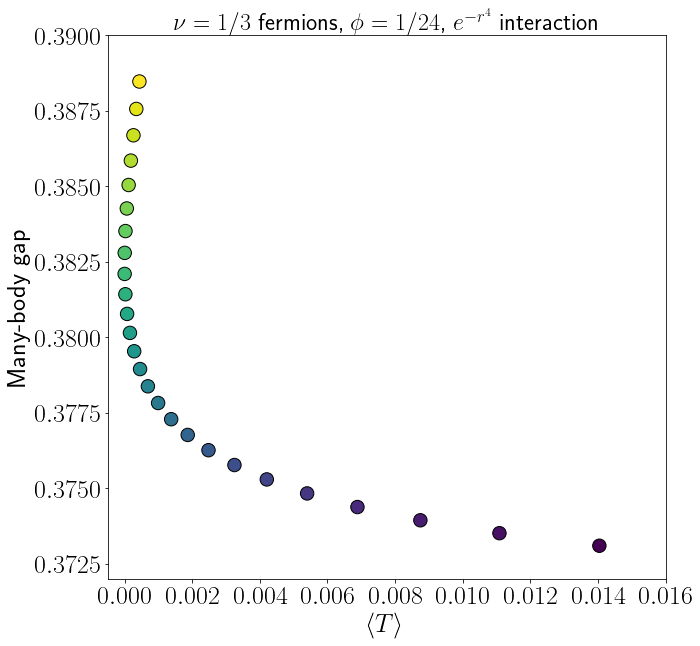

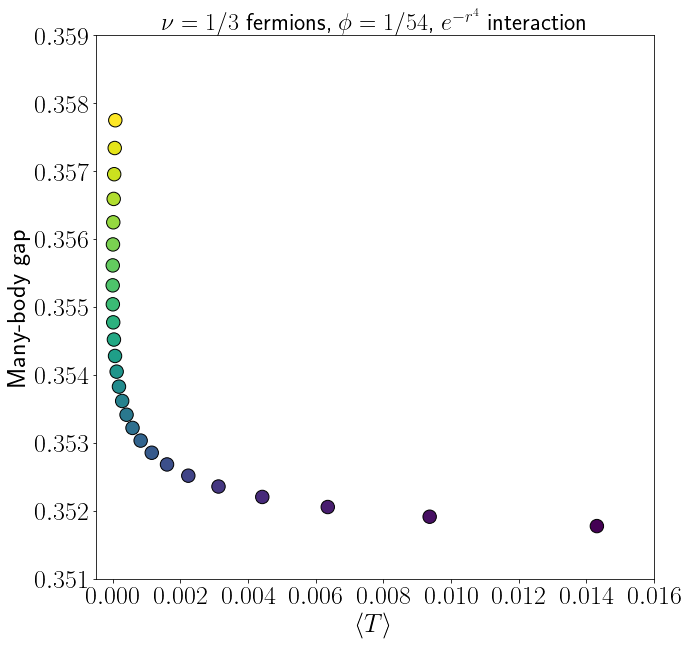

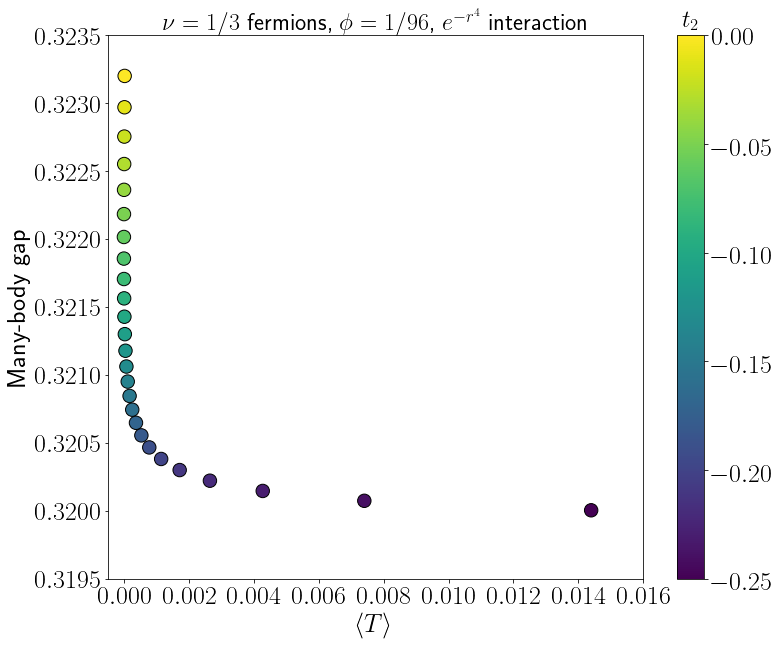

In [45]:
# Fig.11(a)
plt.figure(figsize=(10,10))
plt.scatter(rsquared_full_df.loc[rsquared_full_df['UCarea']==24]['traceIneq'],
            gap_24,
            c=rsquared_full_df.loc[rsquared_full_df['UCarea']==24]['t2'],
           cmap=plt.cm.viridis,
           edgecolor='black',s=180)
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/24$, $e^{-r^4}$ interaction",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.ylim(0.372, 0.39)
plt.savefig("fermions_24_exp.pdf", pad_inches=0, bbox_inches='tight')

# Fig.11(b)
plt.figure(figsize=(10,10))
plt.scatter(rsquared_full_df.loc[rsquared_full_df['UCarea']==54]['traceIneq'],
            gap_54,
            c=rsquared_full_df.loc[rsquared_full_df['UCarea']==54]['t2'],
           cmap=plt.cm.viridis,
           edgecolor='black',s=180)
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/54$, $e^{-r^4}$ interaction",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.ylim(0.351, 0.359)
plt.savefig("fermions_54_exp.pdf", pad_inches=0, bbox_inches='tight')

# Fig.11(c)
plt.figure(figsize=(12,10))
plt.scatter(rsquared_full_df.loc[rsquared_full_df['UCarea']==96]['traceIneq'],
            gap_96,
            c=rsquared_full_df.loc[rsquared_full_df['UCarea']==96]['t2'],
           cmap=plt.cm.viridis,
           edgecolor='black',s=180)
cbar=plt.colorbar()
cbar.ax.set_title(r"$t_2$",fontsize=24)
cbar.ax.tick_params(labelsize=26)
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/96$, $e^{-r^4}$ interaction",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.ylim(0.3195, 0.3235)
plt.savefig("fermions_96_exp.pdf", pad_inches=0, bbox_inches='tight')